# Importando as libs

In [36]:
!pip install pandasql

In [2]:
import pandas as pd
from pandasql import sqldf
from datetime import datetime

In [111]:
import matplotlib as plt

# Leitura dos arquivos

In [112]:
#Tabela Customers
df_customers = pd.read_csv("Customers.csv")

#Tabela Events
df_events = pd.read_csv("Events.csv")

#Tabela Transactions
df_transactions = pd.read_csv("Transactions.csv")

# Tabela Customers

In [113]:
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [114]:
#Verificando linhas e colunas
df_customers.shape

(1000, 11)

In [115]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerApiid              1000 non-null   object 
 1   CustomerId                 1000 non-null   int64  
 2   AUM                        1000 non-null   float64
 3   RegisterDate               1000 non-null   object 
 4   AmountFirstDeposit         1000 non-null   float64
 5   TotalDeposits              1000 non-null   int64  
 6   TotalWithdrawals           1000 non-null   int64  
 7   MonthlyIncome              1000 non-null   float64
 8   FinancialInvestmentsValue  1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  ComputedRiskTolerance      1000 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 86.1+ KB


##### A tabela Customers não contém dados nulos

In [116]:
df_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,1000.0,113653.852000,55113.274917,44.0,69583.000000,123887.500000,161280.000000,1.976300e+05
AUM,1000.0,91684.637534,731956.818917,0.0,100.012157,3877.396861,21399.469655,1.509724e+07
AmountFirstDeposit,1000.0,25710.737689,273690.796700,1.0,120.000000,847.944318,4849.750000,8.000373e+06
TotalDeposits,1000.0,18.876000,24.280283,1.0,4.000000,11.000000,23.250000,2.240000e+02
TotalWithdrawals,1000.0,3.735000,6.583017,0.0,0.000000,1.500000,5.000000,8.600000e+01
MonthlyIncome,1000.0,32588.987080,513055.898063,0.0,2000.000000,4000.000000,8000.000000,1.500000e+07
FinancialInvestmentsValue,1000.0,117110.857000,577946.534151,0.0,0.000000,1000.000000,30000.000000,1.100000e+07
Age,1000.0,33.492000,11.302641,0.0,26.000000,31.000000,38.000000,9.000000e+01
ComputedRiskTolerance,1000.0,24.072160,15.301873,0.0,14.000000,20.000000,27.000000,9.630000e+01


In [117]:
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [118]:
#Convertendo a coluna de 'RegisterDate' para datetime

df_customers['RegisterDate'] = pd.to_datetime(df_customers['RegisterDate'], format='%Y-%m-%d %H:%M:%S')
print(df_customers.dtypes)

CustomerApiid                        object
CustomerId                            int64
AUM                                 float64
RegisterDate                 datetime64[ns]
AmountFirstDeposit                  float64
TotalDeposits                         int64
TotalWithdrawals                      int64
MonthlyIncome                       float64
FinancialInvestmentsValue           float64
Age                                   int64
ComputedRiskTolerance               float64
dtype: object


# Tabela Events

In [119]:
df_events.head()

,EventDate,Platform,CustomerApiid
0,20210112,IOS,5eb045b00d281d0010993b19
1,20210112,IOS,5d54036d7a4e2a00129ac685
2,20210112,IOS,5f160ad08df61f00175d4a94
3,20210112,IOS,5e1f7e25a6a96a0010ee1545
4,20210112,IOS,5e66a9a9e7bbca00119eb5fc


In [120]:
df_events.shape

(1000, 3)

In [121]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EventDate      1000 non-null   int64 
 1   Platform       1000 non-null   object
 2   CustomerApiid  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [122]:
#Convertendo a coluna de 'EventDate' para datetime

df_events['EventDate'] = pd.to_datetime(df_events['EventDate'], format='%Y%m%d')
print(df_events.dtypes)

EventDate        datetime64[ns]
Platform                 object
CustomerApiid            object
dtype: object


# Tabela Transactions

In [123]:
df_transactions.head()

,Id,Direction,Amount,CustomerId,OperatedAt
0,456538,10,200.00,64319,2021-05-03 09:40:42
1,475487,20,108.82,98336,2021-05-11 00:00:00
2,623919,10,1000.00,129337,2021-01-19 12:32:37
3,664611,10,1.00,2443,2021-06-09 13:57:21
4,670787,10,100.00,73726,2021-05-27 09:52:18


In [124]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          1000 non-null   int64  
 1   Direction   1000 non-null   int64  
 2   Amount      1000 non-null   float64
 3   CustomerId  1000 non-null   int64  
 4   OperatedAt  1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [125]:
#Convertendo a coluna de 'OperatedAt' para datetime

df_transactions['OperatedAt'] = pd.to_datetime(df_transactions['OperatedAt'], format='%Y-%m-%d %H:%M:%S')
print(df_transactions.dtypes)

Id                     int64
Direction              int64
Amount               float64
CustomerId             int64
OperatedAt    datetime64[ns]
dtype: object


# Unindo os dataframes para enriquecer a base

In [126]:
'''df_client = pd.merge(df_customers, df_transactions, on='CustomerId', how='left')
df_client.head()'''

"df_client = pd.merge(df_customers, df_transactions, on='CustomerId', how='left')\ndf_client.head()"

In [127]:
df_client = pd.merge(left = df_customers, right = df_transactions, left_on='CustomerId', right_on = 'CustomerId')
df_client.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt
0,597d1f93ad57cd674deb5dfd,64617,65413.030158,2019-01-02 16:58:00,200.0,22,1,8000.0,0.0,37,24.0,1201605,10,2000.0,2021-01-04 09:31:27
1,5a04bd4815a605790aff5c77,24431,0.000000,2018-01-02 18:41:09,300.0,14,9,2000.0,0.0,22,13.5,1201889,10,100.0,2021-01-07 00:00:00
2,5f562b1a8a70670017ab6457,147955,10841.446485,2020-09-07 12:55:00,200.0,14,0,5236.0,100.0,32,17.5,1191683,10,300.0,2021-01-04 00:00:00
3,5b8740c9d345ed000ed4a55c,55461,17797.057930,2018-09-04 13:26:27,8000.0,32,3,20000.0,0.0,59,9.0,1189643,10,1200.0,2021-01-04 00:00:00
4,58779257b93e5a4001f73dd5,1605,0.000000,2017-02-09 15:39:26,200.0,9,15,4021.0,0.0,31,15.0,1199301,10,400.0,2021-01-04 00:00:00


In [128]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerApiid              30 non-null     object        
 1   CustomerId                 30 non-null     int64         
 2   AUM                        30 non-null     float64       
 3   RegisterDate               30 non-null     datetime64[ns]
 4   AmountFirstDeposit         30 non-null     float64       
 5   TotalDeposits              30 non-null     int64         
 6   TotalWithdrawals           30 non-null     int64         
 7   MonthlyIncome              30 non-null     float64       
 8   FinancialInvestmentsValue  30 non-null     float64       
 9   Age                        30 non-null     int64         
 10  ComputedRiskTolerance      30 non-null     float64       
 11  Id                         30 non-null     int64         
 12  Direction 

##### A união das tabelas Customers e Transactions a partir do identificador único do cliente ("CustomerId") resultou em uma base reduzida com apenas 30 linhas. Ao tentar outras formas de união, houve o retorno de muitos dados nulos, sendo que ao dropar, chegaríamos aos mesmos 30 registros finais.
##### Desta forma, optou-se por trabalhar com os dados resultantes da junção acima

___

### Valores de entrada por mês/ano

In [130]:
#Criando a coluna Month para guardar o registro de mês de cadastro do cliente

df_client['Month'] = pd.to_datetime(df_client['RegisterDate']).dt.month
df_client.head()


#Criando a coluna Year para guardar o registro de ano de cadastro do cliente

df_client['Year'] = pd.to_datetime(df_client['RegisterDate']).dt.year
df_client.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month
0,597d1f93ad57cd674deb5dfd,64617,65413.030158,2019-01-02 16:58:00,200.0,22,1,8000.0,0.0,37,24.0,1201605,10,2000.0,2021-01-04 09:31:27,1
1,5a04bd4815a605790aff5c77,24431,0.000000,2018-01-02 18:41:09,300.0,14,9,2000.0,0.0,22,13.5,1201889,10,100.0,2021-01-07 00:00:00,1
2,5f562b1a8a70670017ab6457,147955,10841.446485,2020-09-07 12:55:00,200.0,14,0,5236.0,100.0,32,17.5,1191683,10,300.0,2021-01-04 00:00:00,9
3,5b8740c9d345ed000ed4a55c,55461,17797.057930,2018-09-04 13:26:27,8000.0,32,3,20000.0,0.0,59,9.0,1189643,10,1200.0,2021-01-04 00:00:00,9
4,58779257b93e5a4001f73dd5,1605,0.000000,2017-02-09 15:39:26,200.0,9,15,4021.0,0.0,31,15.0,1199301,10,400.0,2021-01-04 00:00:00,2


In [249]:
'''
df_client2 = pd.merge(left = df_customers, right = df_events, left_on='CustomerApiid', right_on = 'CustomerApiid')
df_client2.head()
'''

"\ndf_client2 = pd.merge(left = df_customers, right = df_events, left_on='CustomerApiid', right_on = 'CustomerApiid')\ndf_client2.head()\n"

_____

In [135]:
'''df_entrada["AmountFirstDeposit"] = df_client["AmountFirstDeposit"].sum().reset_index()'''

AttributeError: 'numpy.float64' object has no attribute 'reset_index'

In [244]:
#Agrupamento do valor de entrada por ano
df_entrada = df_client.groupby(by=["Year"]).sum('AmountFirstDeposit').reset_index()
df_entrada['AmountFirstDeposit'] = df_entrada['AmountFirstDeposit'].astype(int)
df_entrada['Year'] = df_entrada['Year'].astype(int)
df_entrada

,Year,CustomerId,AUM,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,Month
0,2017,15785,137.453072,300,40,28,4321.00,0.0,57,29.00,2399378,30,5400.000000,12
1,2018,308466,64859.001861,13900,155,35,41400.00,0.0,251,124.50,8047098,70,7610.000000,42
2,2019,593538,247404.364848,1250,183,37,28600.02,3000.0,214,122.00,8373290,70,19042.700000,41
3,2020,1925675,105487.172571,38550,311,62,15034136.00,153500.0,461,323.71,16542993,180,10096.295414,83


In [234]:
df_entrada = df_entrada.drop(columns=['CustomerId', 'AUM', 'TotalDeposits', 'TotalWithdrawals', 'MonthlyIncome', 'Age', 'FinancialInvestmentsValue', 'ComputedRiskTolerance', 'Id', 'Direction', 'Amount', 'Month'])
df_entrada.head()

,Year,AmountFirstDeposit
0,2017,300
1,2018,13900
2,2019,1250
3,2020,38550


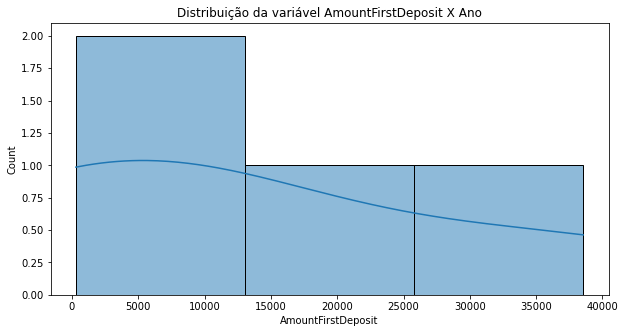

In [237]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_entrada, x="AmountFirstDeposit", kde=True)
plt.title('Distribuição da variável AmountFirstDeposit X Ano')
plt.show()

In [259]:
import seaborn as sns

In [ ]:
'''df_entrada = df_client[df_client['Direction'] == 10]
df_entrada = df_entrada['AmountFirstDeposit'].sum()
print(f'o valor total de entrada é {df_entrada}')'''

SyntaxError: invalid syntax (<ipython-input-186-ffbc80f876c7>, line 2)

- Calcular transações de entrada por mês:
    desmembrar coluna data criando coluna mês - ok
    plotar gráfico sobre entradas - não tá rolando

- quais clientes saíram da plataforma?
    fazer um agrupamento mensal
    plotar gráfico de saída mensal
- pegar todos os clientes que saíram ==20
- df de pessoas que saíram
- calcular o valor total dos que saíram / e mensal
- análises de eventos e clientes com a base reduzida (justificar na célula)

___

### Total de saídas

In [184]:
df_saída = df_client[df_client['Direction'] == 20]
df_saída = df_saída['AUM'].sum()
print(f'o valor total de saídas é R$ {df_saída}')

o valor total de saídas é R$ 10167.8372959409


In [215]:
#Não estou conseguindo plotar os gráficos

plt.figure(figsize=(10,5))
sns.histplot(data=df_saída, x=df_saída['AUM'].sum(), hue=True)
plt.title('Total de saídas')
plt.show()

KeyError: 'AUM'

<Figure size 720x360 with 0 Axes>

In [203]:
'''df_saída['AmountFirstDeposit'] = df_saída['AmountFirstDeposit'].reset_index().applymap(np.int64)
df_saída'''


IndexError: invalid index to scalar variable.

In [226]:
df_saída = df_client[['Month','AUM']].groupby('Month').sum().round(2)
df_saída.reset_index(inplace = True)

#ordenar por ordem crescente
df_saída.sort_values(by = ['Month'], ascending = False, inplace = True)
df_saída


,Month,AUM
10,12,2485.67
9,11,10566.84
8,10,339.05
7,9,28638.50
6,8,60338.06
5,7,684.30
4,6,602.35
3,5,35408.35
2,4,120929.43
1,2,91051.77


___

##### Qual público está entrando na warren nos últimos tempos (idade, renda, investimentos)

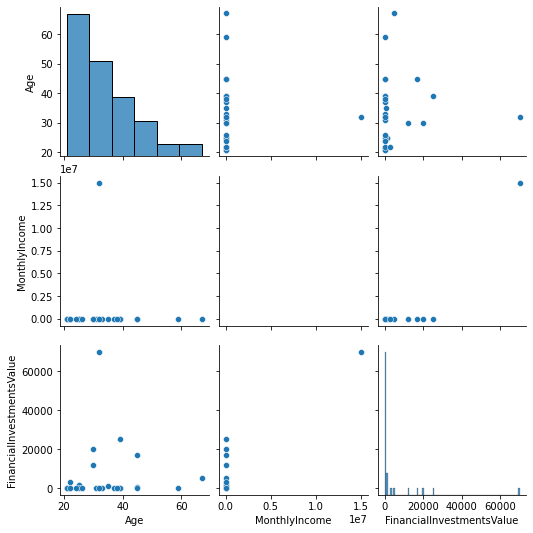

In [261]:
#gráfico de dispersão
sns.pairplot(data = df_client, vars=['Age','MonthlyIncome','FinancialInvestmentsValue'])
plt.show()

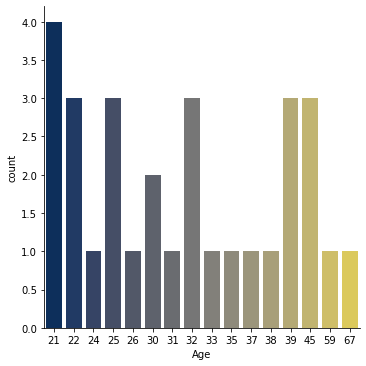

In [264]:

'''sns.catplot(x="Age", kind="count", palette='cividis', data=df_client)'''

C:\Users\re041273\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

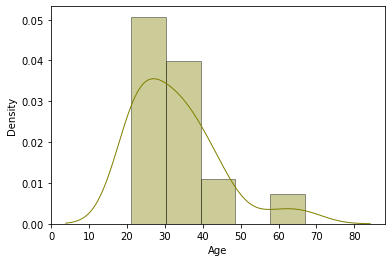

In [270]:
#Distribuição das idades
sns.distplot(df_client["Age"], hist=True, kde=True, 
             color = 'olive', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

In [274]:
#['age']['monthlyincome']['financialinvestmentvalue']

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''y = np.random.rand(10,4)
y[:,0]= np.arange(10)'''
df_perfil = pd.DataFrame(columns=["age", "monthlyincome", "financialinvestmentvalue"])

ax = df_perfil.plot(x="age", y="monthlyincome", kind="bar")
df.plot(x="age", y="monthlyincome", kind="bar", ax=ax, color="C2")
df.plot(x="age", y="financialinvestmentvalue", kind="bar", ax=ax, color="C3")

plt.show()


TypeError: no numeric data to plot

In [208]:
df_client['age'].plot.hist(bins = 20, title = 'Purchases Quantity Distribution')

KeyError: 'age'

In [ ]:
#create reference table of item code and its description
unique_indexes = data.StockCode.drop_duplicates().index
data[['StockCode','Description']].loc[unique_indexes]
ref_stock_desc = data[['StockCode','Description']].loc[unique_indexes] #the ref table
ref_stock_desc.index = range(len(ref_stock_desc)) #make index as 0,1,...

#sum groupby StockCode
df_saída = data[['StockCode','Quantity']].groupby('StockCode').sum()
df_quant_sold.reset_index(inplace = True)
#order descending
df_quant_sold.sort_values(by = ['Quantity'], ascending = False, inplace = True)
#merge
df_quant_sold = df_quant_sold.merge(ref_stock_desc, on = 'StockCode')